> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I worked on TMDb data set. It consisted of about Ten thousand rows and 21 coloumns extracted from tmdb excel file
The analysis work i have done answers the following questions:

1) How many movies released in each year and which year has the highest number of movies released 

2) Profit generated for each movie and were there any losses.

3) What was the profit generated for each year.

4) Average run time for the movies

5) Genere that released highest number of movies

6) Famous production companies

7) Popularity level vs runtime

8) profit vs budget

9) profit vs revenue

10) movies having highest and least profits


In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('C://Users//lekha//OneDrive//Desktop/Udacity//data analysis project//tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [4]:
#Removing the unwanted columns
cols=['id','imdb_id','homepage','tagline','overview','keywords','budget_adj','revenue_adj']
df.drop(columns=cols, axis=1,inplace=True)
df.columns


Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 1.1+ MB


In [6]:
#converting release date to date time data type
df['release_date']=pd.to_datetime(df['release_date']) 

In [7]:
#Checking for any duplicate values that are present
sum(df.duplicated())


1

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
sum(df.duplicated())

0

In [10]:
#checking the budget, revenue, release year if it has null values 
#since it has 0 as their values convert them into nan and drop them
df['budget'].replace(0, np.NAN, inplace=True)

In [11]:
df['revenue'].replace(0, np.NAN, inplace= True)

In [12]:
df['runtime'].replace(0, np.NAN, inplace= True)

In [13]:
df.dropna(inplace= True)

In [14]:
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 

Text(0.5, 1.0, 'Movies released in each year')

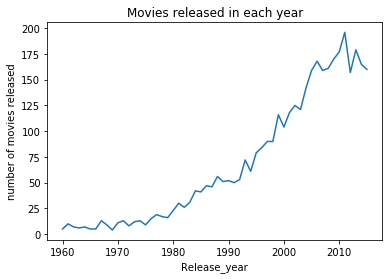

In [40]:
#Research Question 1 which year did the highest number of movies got released
count_year = df['release_year'].value_counts().sort_index()
plt.plot(count_year)
plt.xlabel('Release_year')
plt.ylabel('number of movies released')
plt.title('Movies released in each year')

From the above analysis we can see that the number of movies released each year increased drastically until 2011 and then it got decreased again and so from the above we can say that 2011 is the highest number of movies released year

### Research Question 2  

Profit generated for  movie and were there any losses.


In [41]:
#profit for the movies
df['profit_loss']=df['revenue']-df['budget']
len(df[df['profit_loss'] < 0])

1046

In [42]:
len(df[df['profit_loss']>0])

2756

In [91]:
df['profit_loss'].mean()

71365395.43206307

In [94]:
df['budget'].mean()

37607996.559526935

In [95]:
df['runtime'].mean()

109.35111695137977

we can see that there were 1046 movies that were in loss and 2756 movies got profits

### Research Question 3

What was the profit generated for each year?

In [43]:
#profit for movies over year
profitcount= df.groupby('release_year')['profit_loss'].mean()

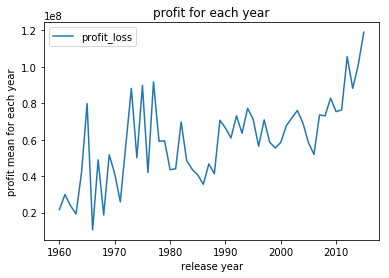

In [51]:
plt.plot(profitcount)
plt.xlabel('release year')
plt.ylabel('profit mean for each year')
plt.title('profit for each year')
plt.legend()

For 2015 there were movies that generated highest number of profits

### Research Question 4

What is the average run time for each year

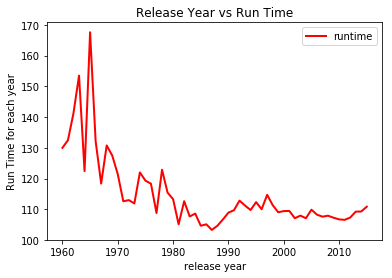

In [53]:
#Average run time for each year
runtimecount= df.groupby('release_year')['runtime'].mean().plot(color='red', linewidth=2)
plt.xlabel('release year')
plt.ylabel('Run Time for each year')
plt.title('Release Year vs Run Time')
plt.legend()

### Research question 5

Genre that was more popular ?

In [26]:
#Splitting the columns by |
def splitcols(column):
    k = df[column].str.cat(sep="|")
    k = pd.Series(k.split('|'))
    count = k.value_counts()
    return count

Text(0.5, 1.0, 'Genre that is more famous')

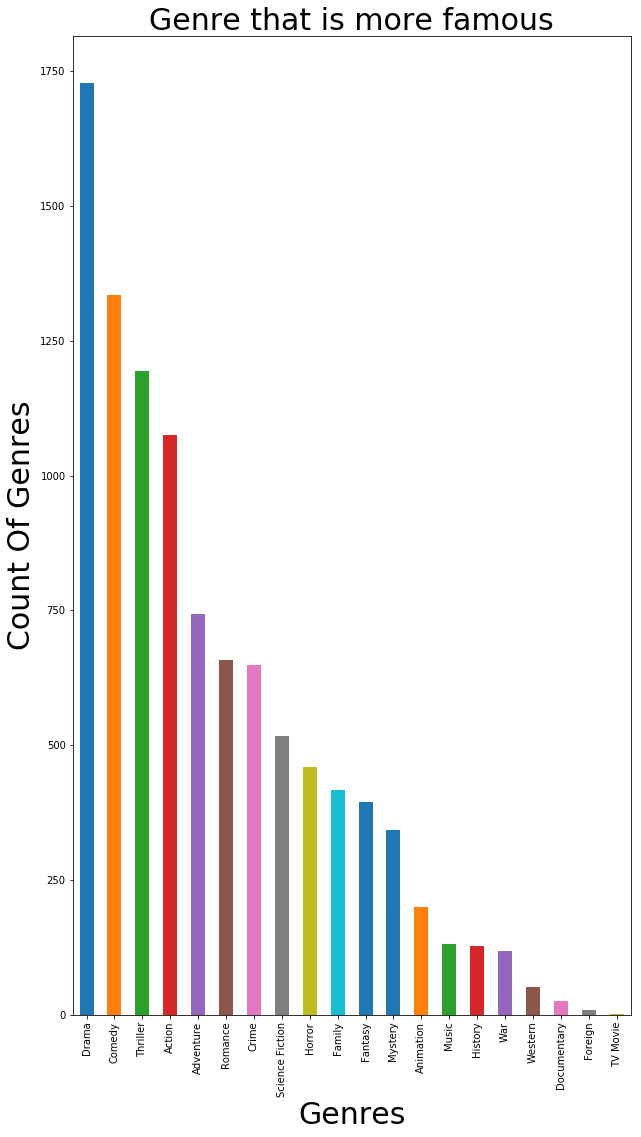

In [66]:
splitcols('genres').plot(kind='bar', figsize=(10,18))
plt.xlabel('Genres', size = 30)
plt.ylabel('Count Of Genres', size = 30)
plt.title('Genre that is more famous', size=30)

From the above representation Drama is the genre that is more popular

### Research question 6

Famous production companies

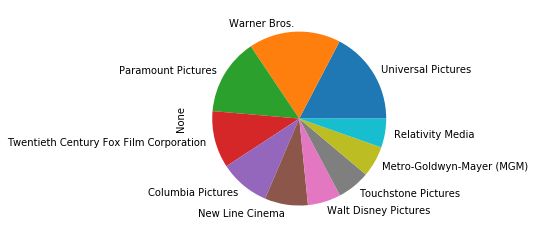

In [67]:
prodcompanies=splitcols('production_companies')
prodcompanies.head(10).plot(kind='pie')

Paramount pictures, Universal pictures and warner bros are the famous production houses

### Research question 7

Popularity level vs runtime

In [29]:
#Popularity level vs runtime
bin_edges=[0.010335,0.470651,1.387163, 32.985763]
bin_names=['popular', 'more popular', 'most popular']

In [30]:
df['popluarity_levels']=pd.cut(df['popularity'], bin_edges, labels=bin_names)

Text(0.5, 1.0, 'Popularity level vs Runtime')

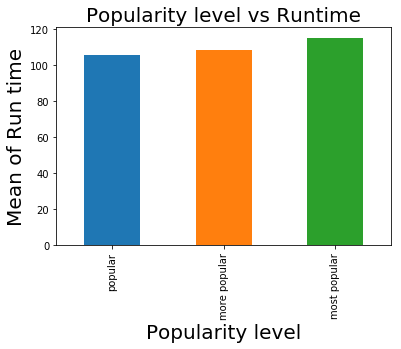

In [70]:
x=df.groupby('popluarity_levels')['runtime'].mean().plot(kind='bar')
plt.xlabel('Popularity level', size = 20)
plt.ylabel('Mean of Run time', size= 20)
plt.title('Popularity level vs Runtime', size=20)


The most popular movies have an average run time of 118

### Research question 8

Budget VS Profit

Text(0.5, 1.0, 'Budget VS Profit')

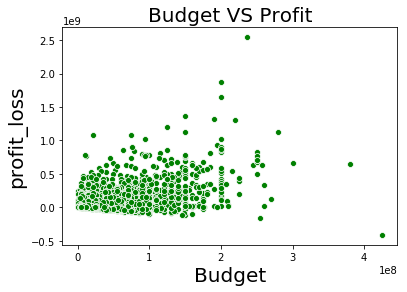

In [88]:
#profit vs budget
sns.scatterplot( x='budget',y='profit_loss', data=df, color='green')
plt.ylabel('profit_loss', size= 20)
plt.xlabel('Budget', size= 20)
plt.title('Budget VS Profit', size= 20)

### Research question 9

Revenue VS Profit 

Text(0.5, 1.0, 'Revenue VS Profit ')

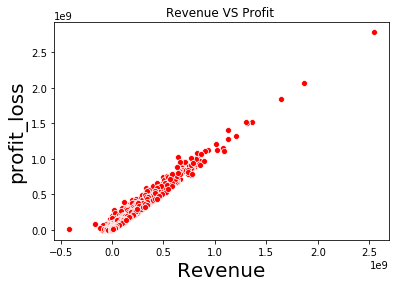

In [85]:
#profit vs revenue
sns.scatterplot( x='profit_loss',y='revenue',data=df, color='Red')
plt.ylabel('profit_loss', size= 20)
plt.xlabel('Revenue', size= 20)
plt.title('Revenue VS Profit ')

In the above visualization we can say that as the revenue increases the profit also increase

### Research question 10

Movies having highest and least profits

In [35]:
#min values
def minvalues(column):
    return df.loc[df[column].idxmin()]

In [36]:
minvalues('profit_loss')

popularity                                                        0.25054
budget                                                           4.25e+08
revenue                                                       1.10876e+07
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                       Sngmoo Lee
runtime                                                               100
genres                          Adventure|Fantasy|Action|Western|Thriller
production_companies                             Boram Entertainment Inc.
release_date                                          2010-12-02 00:00:00
vote_count                                                             74
vote_average                                                          6.4
release_year                                                         2010
profit_loss                           

In [37]:
#min values
def maxvalues(column):
    return df.loc[df[column].idxmax()]

In [38]:
maxvalues('profit_loss')

popularity                                                        9.43277
budget                                                           2.37e+08
revenue                                                       2.78151e+09
original_title                                                     Avatar
cast                    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                                    James Cameron
runtime                                                               162
genres                           Action|Adventure|Fantasy|Science Fiction
production_companies    Ingenious Film Partners|Twentieth Century Fox ...
release_date                                          2009-12-10 00:00:00
vote_count                                                           8458
vote_average                                                          7.1
release_year                                                         2009
profit_loss                           

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

If the genre is Drama and the production house is either of Paramount pictures, Universal pictures and warner bros, the average run time is around 100 minutes and the average budget is arount 35 million then there is a chance for generating more profits for the movie that got released.


### Limitations

We can see that there is a chance that the data given is accurate so we cannot predict the profit 
for the movies accurately. The units of measures may not be similar for all the column fields 
which leads to inaccurate results.
Dropping the missing rows and duplicate rows may also lead to inaccurate results.

In [100]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Data Analysis Project.ipynb'])

0